<a href="https://colab.research.google.com/github/ayankins/HeartRatePredictor/blob/main/HEART_RATE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = 'heart_rate_dataset_no_strings.csv'
heart_rate_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
heart_rate_data.head()


,Age,Gender,Height,Weight,BMI,Systolic_BP,Diastolic_BP,HeartRate
0,56,1,164,78,27.015136,175,68,98.0
1,69,0,170,81,18.713171,150,115,92.0
2,46,1,196,93,34.464309,136,115,85.0
3,32,0,158,67,31.578141,116,60,62.0
4,60,0,158,55,22.977975,157,88,NaN


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Height'].plot(kind='hist', bins=20, title='Height')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Age', y='Gender', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Gender', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Height', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Weight', y='BMI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Height'].plot(kind='line', figsize=(8, 4), title='Height')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

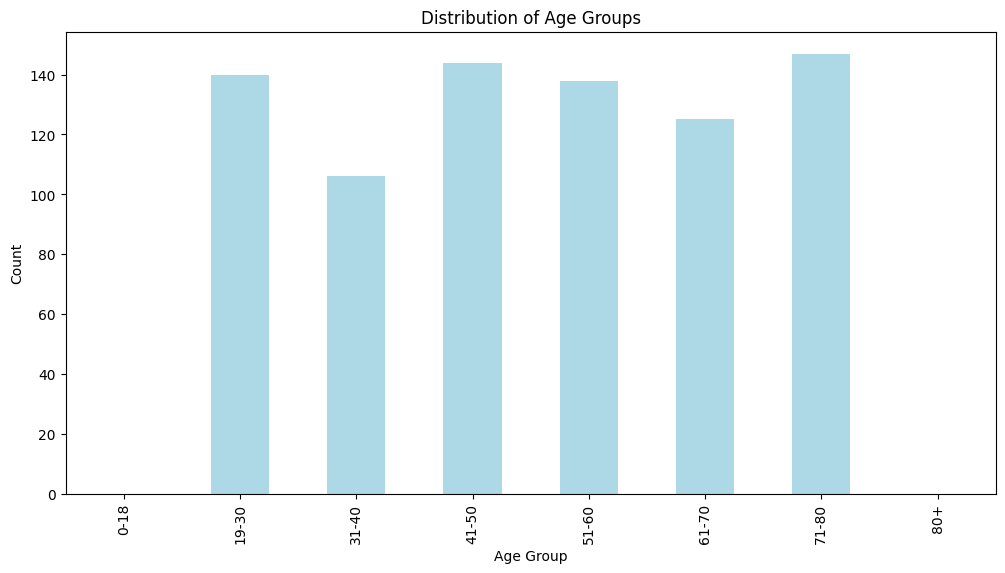

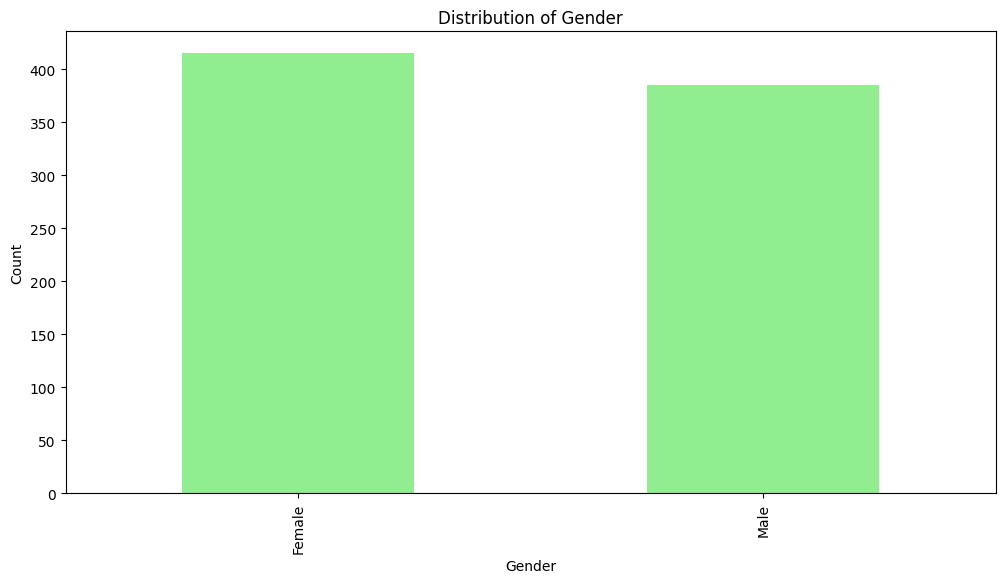

In [ ]:
# Create Age Group column
bins = [0, 18, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']
heart_rate_data['Age_Group'] = pd.cut(heart_rate_data['Age'], bins=bins, labels=labels, right=False)

# Plot Age Group Distribution
plt.figure(figsize=(12, 6))
age_group_counts = heart_rate_data['Age_Group'].value_counts().sort_index()
age_group_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Plot Gender Distribution
plt.figure(figsize=(12, 6))
gender_counts = heart_rate_data['Gender'].value_counts()
gender_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


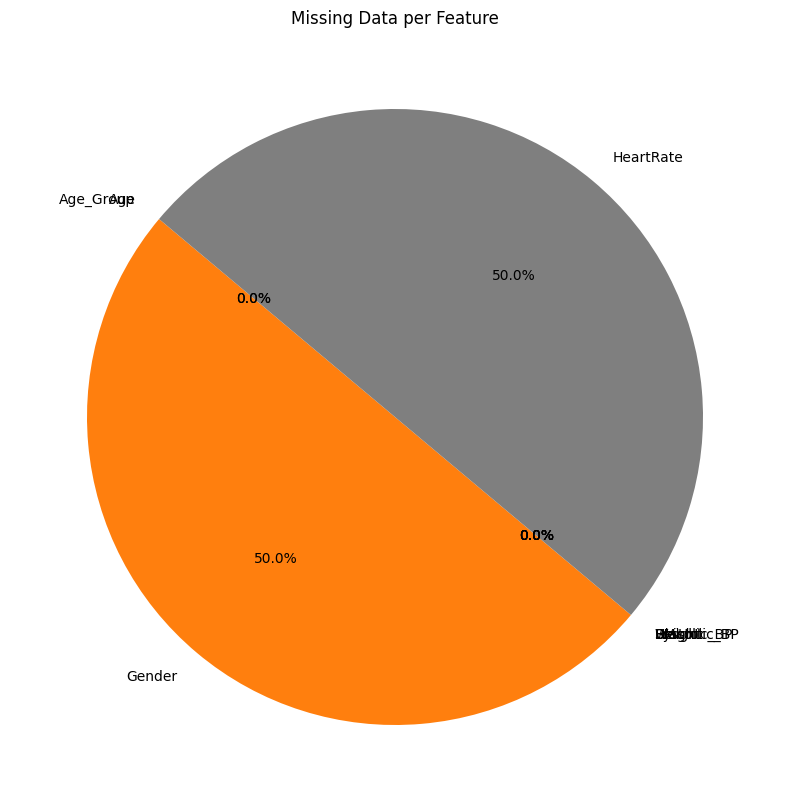

In [ ]:
# Introduce missing values for demonstration (if not already done)
df_missing = heart_rate_data.copy()
df_missing.iloc[::10, 1] = np.nan  # introduce some missing values

# Calculate missing data
missing_data = df_missing.isnull().sum()

# Pie chart of missing data per feature
plt.figure(figsize=(15, 10))
plt.pie(missing_data, labels=missing_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Missing Data per Feature')
plt.show()


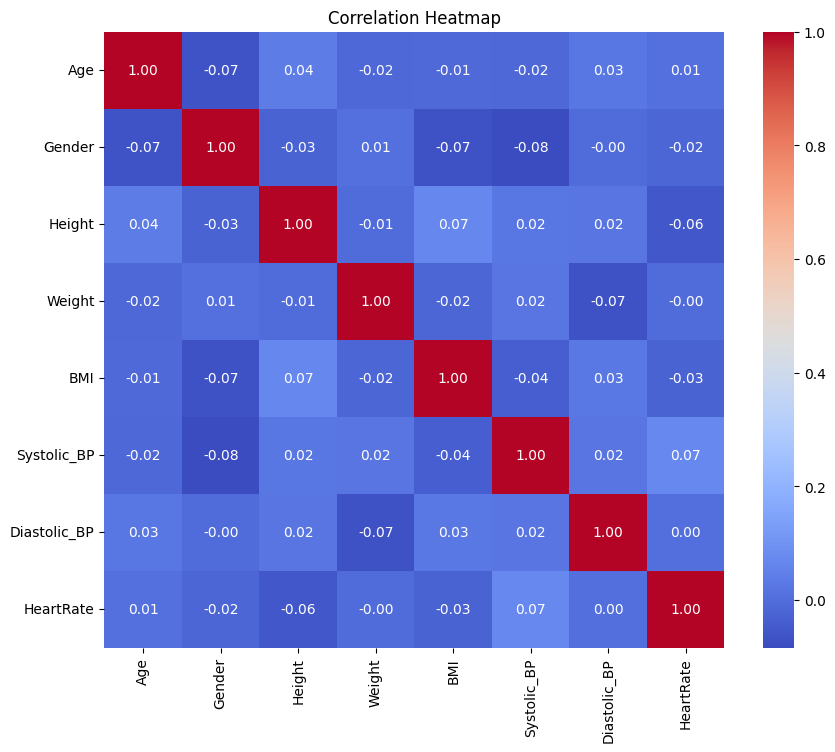

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
# Calculate correlations on numerical columns only
sns.heatmap(heart_rate_data.select_dtypes(include=['number']).corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Handle missing values for numerical columns only
for column in heart_rate_data.select_dtypes(include=['number']):
    heart_rate_data[column].fillna(heart_rate_data[column].mean(), inplace=True)

# Handle missing values for categorical columns (if any) with the most frequent value
for column in heart_rate_data.select_dtypes(include=['category']):
    heart_rate_data[column].fillna(heart_rate_data[column].mode()[0], inplace=True)

# Define feature matrix (X) and target vector (y)
X = heart_rate_data.drop(columns=['HeartRate'])
y = heart_rate_data['HeartRate']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Handle missing values for numerical columns only
for column in heart_rate_data.select_dtypes(include=['number']):
    heart_rate_data[column].fillna(heart_rate_data[column].mean(), inplace=True)

# Handle missing values for categorical columns (if any) with the most frequent value
for column in heart_rate_data.select_dtypes(include=['category']):
    heart_rate_data[column].fillna(heart_rate_data[column].mode()[0], inplace=True)

# Convert 'Age_Group' to numerical representation using one-hot encoding
X = pd.get_dummies(heart_rate_data.drop(columns=['HeartRate']), columns=['Age_Group'])
y = heart_rate_data['HeartRate']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict using the Linear Regression model
lr_predictions = lr_model.predict(X_test)

# Evaluate the Linear Regression model
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print('Linear Regression Model')
print(f'RMSE: {lr_rmse}')
print(f'MAE: {lr_mae}')
print(f'R² Score: {lr_r2}')

Linear Regression Model
RMSE: 14.51607711178282
MAE: 11.961643085596892
R² Score: -0.054410950240301625


In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using the Random Forest model
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print('Random Forest Model')
print(f'RMSE: {rf_rmse}')
print(f'MAE: {rf_mae}')
print(f'R² Score: {rf_r2}')


Random Forest Model
RMSE: 14.785226778068242
MAE: 12.175757812499999
R² Score: -0.09387413825790158


In [ ]:
# Compare model performance
models = ['Linear Regression', 'Random Forest']
rmse = [lr_rmse, rf_rmse]
mae = [lr_mae, rf_mae]
r2 = [lr_r2, rf_r2]

comparison_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse,
    'MAE': mae,
    'R² Score': r2
})

print(comparison_df)


               Model       RMSE        MAE  R² Score
0  Linear Regression  14.516077  11.961643 -0.054411
1      Random Forest  14.785227  12.175758 -0.093874


Model Evaluation

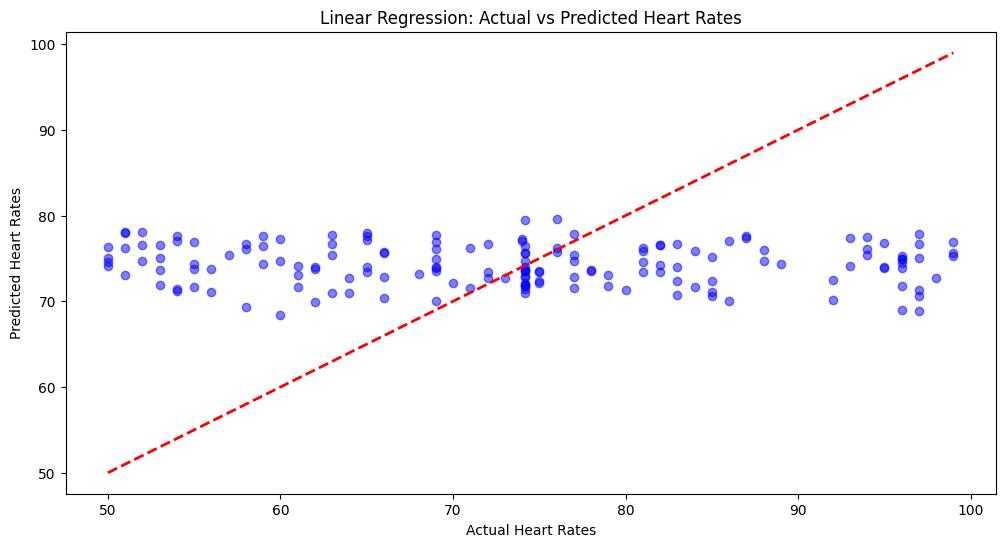

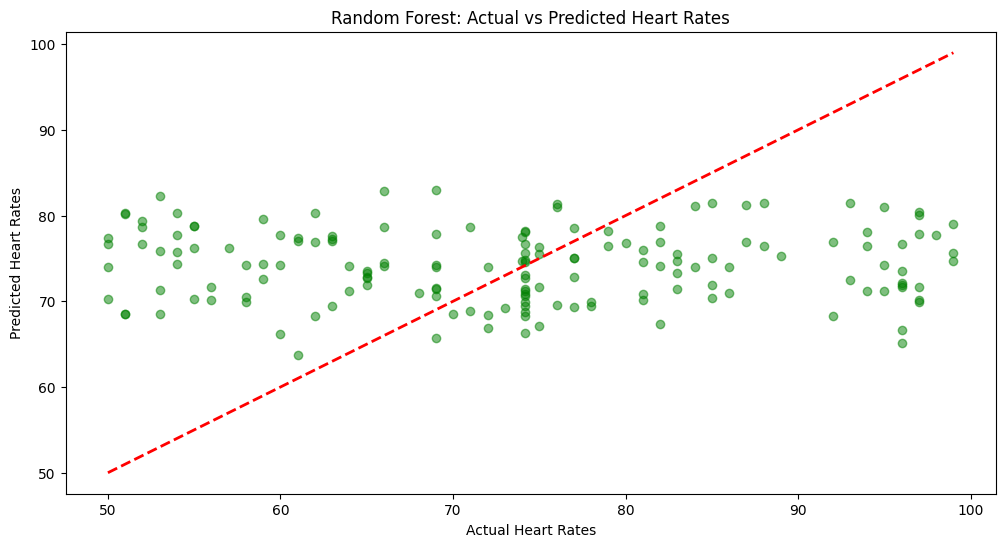

In [ ]:
# Plot predictions vs actual values for Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test, lr_predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.title('Linear Regression: Actual vs Predicted Heart Rates')
plt.xlabel('Actual Heart Rates')
plt.ylabel('Predicted Heart Rates')
plt.show()

# Plot predictions vs actual values for Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_predictions, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.title('Random Forest: Actual vs Predicted Heart Rates')
plt.xlabel('Actual Heart Rates')
plt.ylabel('Predicted Heart Rates')
plt.show()


In [ ]:
def predict_heart_rate(model, new_data):
    """
    Predict heart rate using the provided model.
    :param model: Trained machine learning model
    :param new_data: DataFrame containing the new input data
    :return: Predicted heart rate
    """
    # Apply the same preprocessing to new_data as done during training
    new_data_encoded = pd.get_dummies(new_data, columns=['Age_Group'])  # Assuming 'Age_Group' needs one-hot encoding

    # Ensure all columns from training data are present in new_data
    for col in X_train.columns:
        if col not in new_data_encoded.columns:
            new_data_encoded[col] = 0  # Add missing columns and fill with 0

    # Reorder columns to match the order during training
    new_data_encoded = new_data_encoded[X_train.columns]

    return model.predict(new_data_encoded)

# Example new data input (make sure the new data has the same structure as X_train after preprocessing)
new_data = pd.DataFrame({
    'Age_Group': ['31-40'],  # Example age group
    'Age': [35],
    'Gender': [1],
    'BMI': [25.0],
    'Blood_Pressure': [120],
    'Cholesterol': [200],
    'Smoking': [0],
    'Diabetes': [0],
    'Physical_Activity': [1]
})

# Predict using Linear Regression
lr_pred = predict_heart_rate(lr_model, new_data)
print(f'Linear Regression Prediction: {lr_pred[0]}')

# Predict using Random Forest
rf_pred = predict_heart_rate(rf_model, new_data)
print(f'Random Forest Prediction: {rf_pred[0]}')

Linear Regression Prediction: 72.46655905800282
Random Forest Prediction: 75.306875


In [31]:
import ipywidgets as widgets
from ipywidgets import interact

# Define widgets for each input feature
age_group_widget = widgets.Dropdown(
    options=heart_rate_data['Age_Group'].unique(),
    value='31-40',
    description='Age Group:',
)

age_widget = widgets.IntSlider(
    min=18,
    max=80,
    value=35,
    description='Age:',
)

gender_widget = widgets.Dropdown(
    options=[0, 1],
    value=1,
    description='Gender:',
)

bmi_widget = widgets.FloatSlider(
    min=18.5,
    max=40.0,
    value=25.0,
    description='BMI:',
)

blood_pressure_widget = widgets.IntSlider(
    min=80,
    max=200,
    value=120,
    description='Blood Pressure:',
)

cholesterol_widget = widgets.IntSlider(
    min=100,
    max=500,
    value=200,
    description='Cholesterol:',
)

smoking_widget = widgets.Dropdown(
    options=[0, 1],
    value=0,
    description='Smoking:',
)

diabetes_widget = widgets.Dropdown(
    options=[0, 1],
    value=0,
    description='Diabetes:',
)

physical_activity_widget = widgets.Dropdown(
    options=[0, 1],
    value=1,
    description='Physical Activity:',
)

# Create a function to predict heart rate based on user input
def predict_heart_rate_interactive(
    age_group, age, gender, bmi, blood_pressure, cholesterol, smoking, diabetes, physical_activity
):
    new_data = pd.DataFrame({
        'Age_Group': [age_group],
        'Age': [age],
        'Gender': [gender],
        'BMI': [bmi],
        'Blood_Pressure': [blood_pressure],
        'Cholesterol': [cholesterol],
        'Smoking': [smoking],
        'Diabetes': [diabetes],
        'Physical_Activity': [physical_activity],
    })

    lr_pred = predict_heart_rate(lr_model, new_data)[0]
    rf_pred = predict_heart_rate(rf_model, new_data)[0]

    print(f'Linear Regression Prediction: {lr_pred}')
    print(f'Random Forest Prediction: {rf_pred}')

# Create the interactive interface
interact(
    predict_heart_rate_interactive,
    age_group=age_group_widget,
    age=age_widget,
    gender=gender_widget,
    bmi=bmi_widget,
    blood_pressure=blood_pressure_widget,
    cholesterol=cholesterol_widget,
    smoking=smoking_widget,
    diabetes=diabetes_widget,
    physical_activity=physical_activity_widget,
)


interactive(children=(Dropdown(description='Age Group:', index=3, options=('51-60', '61-70', '41-50', '31-40',…

<function __main__.predict_heart_rate_interactive(age_group, age, gender, bmi, blood_pressure, cholesterol, smoking, diabetes, physical_activity)>

In [32]:
import joblib

# Save Linear Regression model
joblib.dump(lr_model, 'lr_model.pkl')

# Save Random Forest model
joblib.dump(rf_model, 'rf_model.pkl')

# To load the models back
# lr_model = joblib.load('lr_model.pkl')
# rf_model = joblib.load('rf_model.pkl')


['rf_model.pkl']